In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [3]:
df=pd.read_csv('Cobined_Flight_Weather.csv',index_col=[0])

In [4]:
df

,FlightDate,Quarter,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,2016-01-01,1,2016,1,SEA,JFK,1,741.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
1,2016-01-02,1,2016,1,SEA,JFK,2,737.0,0.0,745,...,1024,0,24,8,36,32,64,2016-01-02,700,SEA
2,2016-01-03,1,2016,1,SEA,JFK,3,743.0,0.0,745,...,1018,0,20,7,32,28,62,2016-01-03,700,SEA
3,2016-01-04,1,2016,1,SEA,JFK,4,737.0,0.0,745,...,1010,97,32,8,34,31,95,2016-01-04,700,SEA
4,2016-01-05,1,2016,1,SEA,JFK,5,708.0,0.0,710,...,1001,100,35,10,38,35,91,2016-01-05,700,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840269,2017-09-25,3,2017,9,SFO,JFK,25,2038.0,0.0,2045,...,1011,8,61,20,71,71,71,2017-09-25,2000,SFO
1840270,2017-09-25,3,2017,9,EWR,MCO,25,1200.0,0.0,1205,...,1017,8,68,8,83,83,60,2017-09-25,1200,EWR
1840271,2017-09-25,3,2017,9,MCO,EWR,25,1143.0,0.0,1141,...,1012,19,74,10,82,82,77,2017-09-25,1100,MCO
1840272,2017-09-25,3,2017,9,LAS,JFK,25,2157.0,0.0,2159,...,1011,1,27,19,64,64,24,2017-09-25,2200,LAS


In [5]:
df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'Origin', 'Dest',
       'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'rounded_time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date',
       'time', 'airport_code'],
      dtype='object')

In [6]:
df[df['ArrDel15'] == 1.0]['ArrDelayMinutes'].value_counts()

ArrDelayMinutes
15.0      13314
16.0      12476
17.0      11929
18.0      11359
19.0      10566
          ...  
905.0         1
923.0         1
626.0         1
1438.0        1
688.0         1
Name: count, Length: 1059, dtype: int64

In [7]:
df = df.drop(columns = ['airport_code','rounded_time','date','FlightDate','OriginAirportID', 'DestAirportID','WindChillF', 'CRSArrTime', 'ArrTime', 'ArrDel15', 'time', 'Quarter'])

In [8]:
df = df[df['ArrDelayMinutes'] > 15]

In [9]:
df=df.reset_index()

In [10]:
df

,index,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,...,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
0,9,2016,1,SEA,JFK,10,711.0,0.0,710,1.0,...,112,122,0.0,10,1024,87,35,9,37,78
1,13,2016,1,SEA,JFK,14,737.0,1.0,645,52.0,...,176,116,0.1,10,1017,66,37,21,40,90
2,15,2016,1,SEA,JFK,17,728.0,1.0,645,43.0,...,128,266,0.4,5,1009,100,38,28,44,80
3,20,2016,1,SEA,JFK,22,1229.0,1.0,645,344.0,...,172,353,1.5,9,1004,100,41,32,46,85
4,28,2016,1,JFK,SEA,2,1929.0,1.0,1825,64.0,...,244,113,0.0,10,1015,0,29,25,38,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372400,1840202,2017,9,JFK,LAX,24,2301.0,1.0,2143,78.0,...,192,113,0.0,10,1017,21,68,12,72,85
372401,1840207,2017,9,EWR,MCO,24,1640.0,1.0,1034,366.0,...,173,113,0.0,10,1018,0,65,11,81,60
372402,1840212,2017,9,LAS,SFO,24,1508.0,0.0,1503,5.0,...,25,113,0.0,10,1012,0,26,10,72,18
372403,1840251,2017,9,LAX,JFK,25,1410.0,0.0,1410,0.0,...,217,116,0.0,10,1009,7,54,19,80,42


In [11]:
df = df.drop('index', axis = 1)

In [12]:
df

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,ArrDelayMinutes,...,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
0,2016,1,SEA,JFK,10,711.0,0.0,710,1.0,44.0,...,112,122,0.0,10,1024,87,35,9,37,78
1,2016,1,SEA,JFK,14,737.0,1.0,645,52.0,31.0,...,176,116,0.1,10,1017,66,37,21,40,90
2,2016,1,SEA,JFK,17,728.0,1.0,645,43.0,26.0,...,128,266,0.4,5,1009,100,38,28,44,80
3,2016,1,SEA,JFK,22,1229.0,1.0,645,344.0,335.0,...,172,353,1.5,9,1004,100,41,32,46,85
4,2016,1,JFK,SEA,2,1929.0,1.0,1825,64.0,56.0,...,244,113,0.0,10,1015,0,29,25,38,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372400,2017,9,JFK,LAX,24,2301.0,1.0,2143,78.0,60.0,...,192,113,0.0,10,1017,21,68,12,72,85
372401,2017,9,EWR,MCO,24,1640.0,1.0,1034,366.0,354.0,...,173,113,0.0,10,1018,0,65,11,81,60
372402,2017,9,LAS,SFO,24,1508.0,0.0,1503,5.0,19.0,...,25,113,0.0,10,1012,0,26,10,72,18
372403,2017,9,LAX,JFK,25,1410.0,0.0,1410,0.0,25.0,...,217,116,0.0,10,1009,7,54,19,80,42


In [13]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df["Origin"] = labelEncoder.fit_transform(df["Origin"])
df["Dest"] = labelEncoder.fit_transform(df["Dest"])

In [14]:
X = df.drop('ArrDelayMinutes', axis = 1)
y = df['ArrDelayMinutes']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [16]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mselg = mean_squared_error(y_test, y_pred)
rmse = mselg ** 0.5  
r2lg = r2_score(y_test, y_pred)
print(mselg)
print(rmse)
print(r2lg)

315.6074187237402
17.765343191836745
0.9394735125879307


In [17]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [18]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_test)

# Evaluate the model
msedt = mean_squared_error(y_test, y_pred)
print("Best Mean Squared Error:", msedt)

C:\Users\tharu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tharu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tharu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\tharu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Best Mean Squared Error: 513.4493103117861


In [19]:
rmse = msedt ** 0.5  
r2dt= r2_score(y_test, y_pred)
print(rmse)
print(r2dt)



22.65941990236701
0.9015318355221403


In [29]:
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1)

# Train the model on the training data
regressor_rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor_rf.predict(X_test)

# Evaluate the model
mserf = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mserf)

Mean Squared Error: 288.6626113968691


In [30]:
rmse = mserf ** 0.5  
r2rf = r2_score(y_test, y_pred)
print(mserf)
print(rmse)
print(r2rf)

288.6626113968691
16.99007390792839
0.9446409276888984


In [31]:
regressor_xg = XGBRegressor(n_estimators=1000, learning_rate=0.5, max_depth=5, random_state=42)

# Train the model on the training data
regressor_xg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor_xg.predict(X_test)

# Evaluate the model
msexg = mean_squared_error(y_test, y_pred)
rmse = msexg ** 0.5  
r2xg = r2_score(y_test, y_pred)
print(msexg)
print(rmse)
print(r2xg)

308.29311421843266
17.558277655238076
0.9408762336055759


A Model with lower MSE and Higher R2 is better for pipeline Among the four we can compare and see 

In [32]:
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MSE': [mselg, msedt, mserf, msexg],
    'R-squared': [r2lg, r2dt, r2rf, r2xg]
}
df = pd.DataFrame(data)

# Display the comparison table
print("Comparison of Regression Models:")
print(df)


Comparison of Regression Models:
               Model         MSE  R-squared
0  Linear Regression  315.607419   0.939474
1      Decision Tree  513.449310   0.901532
2      Random Forest  288.662611   0.944641
3            XGBoost  308.293114   0.940876


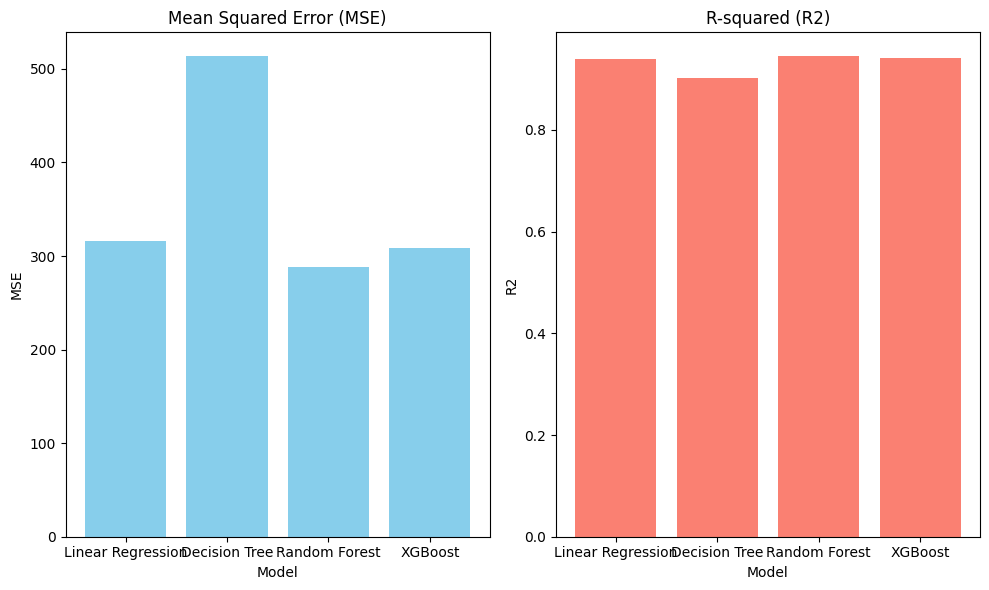

In [33]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(df['Model'], df['MSE'], color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(df['Model'], df['R-squared'], color='salmon')
plt.title('R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

To build a pipeline for regression we have chosen random forest algo as it has lower mse and higher r2 among the other four

In [36]:
import pickle as pkl

In [37]:
pkl.dump(regressor_rf, open('rf_reg.pkl', 'wb'))

In [38]:
regressor_rf

RandomForestRegressor(n_jobs=-1, random_state=42)